# Geo Pandas Example

In [10]:
import fiona
import geopandas as gpd

%matplotlib inline

In [7]:
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'
#df = gpd.read_file('Test_250m_lower.kml')

In [14]:
df = gpd.read_file('./fs_eastern_wsr/fs_eastern_wsr.shp')
df.head(2)

,OBJECTID,RIVER_ID,WSR_RIVER_,WSR_RIVE_1,STATE,MANAGEMENT,CLASSIFICA,ORV_SOURCE,MANAGING_E,PUBLIC_LAW,PUBLIC_L_1,ENACTED_DA,AGENCY,WEBLINK,LOCALWEBSI,RIVERCATEG,PHOTOLINK,PHOTOCREDI,SHAPELEN,geometry
0,61,10,Chattooga Wild and Scenic River,Chattooga,Georgia & North Carolina & South Carolina,Y,,,USFS,93-279,93-279,1974-05-10T00:00:00.000Z,USFS,http://www.rivers.gov/rivers/chattooga.php,,Federally Administered,https://farm8.staticflickr.com/7287/1680465023...,Tim Palmer,0.920180,(LINESTRING (-83.32658382628432 34.75608490336...
1,79,116,Clarks Fork Wild and Scenic River,Clarks Fork,Wyoming,Y,,,USFS,CLARKS FORK WILD AND SCENIC RIVER DESIGNATION ...,101-628,1990-11-28T00:00:00.000Z,USFS,http://www.rivers.gov/rivers/yellowstone.php,,Federally Administered,https://c2.staticflickr.com/8/7626/16803314202...,Tim Palmer,0.425912,LINESTRING (-109.3009895776885 44.846558830854...


In [12]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 20 columns):
OBJECTID      75 non-null int64
RIVER_ID      75 non-null object
WSR_RIVER_    75 non-null object
WSR_RIVE_1    75 non-null object
STATE         75 non-null object
MANAGEMENT    75 non-null object
CLASSIFICA    75 non-null object
ORV_SOURCE    75 non-null object
MANAGING_E    75 non-null object
PUBLIC_LAW    75 non-null object
PUBLIC_L_1    75 non-null object
ENACTED_DA    75 non-null object
AGENCY        75 non-null object
WEBLINK       75 non-null object
LOCALWEBSI    75 non-null object
RIVERCATEG    75 non-null object
PHOTOLINK     75 non-null object
PHOTOCREDI    75 non-null object
SHAPELEN      75 non-null float64
geometry      75 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 11.8+ KB


In [24]:
sample = df.iloc[0]
sample

OBJECTID                                                     61
RIVER_ID                                                     10
WSR_RIVER_                      Chattooga Wild and Scenic River
WSR_RIVE_1                                            Chattooga
STATE                 Georgia & North Carolina & South Carolina
MANAGEMENT                                                    Y
CLASSIFICA                                                     
ORV_SOURCE                                                     
MANAGING_E                                                 USFS
PUBLIC_LAW                                               93-279
PUBLIC_L_1                                               93-279
ENACTED_DA                             1974-05-10T00:00:00.000Z
AGENCY                                                     USFS
WEBLINK              http://www.rivers.gov/rivers/chattooga.php
LOCALWEBSI                                                     
RIVERCATEG                              

### Example of getting image from dataframe using requests

In [26]:
sample['PHOTOLINK']

'https://farm8.staticflickr.com/7287/16804650235_66ccc2cc7f_m.jpg'

In [30]:
import requests

r = requests.get(sample['PHOTOLINK'])

with open('./image.jpg', 'wb') as f:
    f.write(r.content)

In [34]:
!open .

### Agency

In [17]:
df['AGENCY'].value_counts()

USFS         36
NPS          35
NPS, FWS      2
BLM           1
USFS, NPS     1
Name: AGENCY, dtype: int64

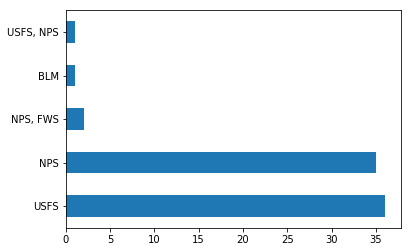

In [20]:
df['AGENCY'].value_counts().plot(kind='barh')

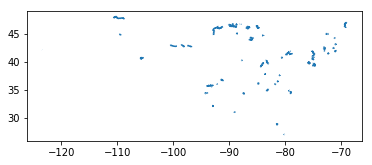

In [39]:
df['geometry'].plot()

In [40]:
test = gpd.read_file('./fs_eastern_wsr_Notebook_Test.kml')
test.head(2)

,Name,Description,geometry
0,10,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(LINESTRING Z (-83.17034969894885 34.916866541...
1,116,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(LINESTRING Z (-109.636023155304 44.8657235394...


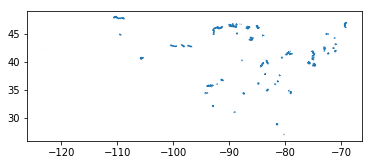

In [41]:
test.plot()